In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
import scipy
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split

In [25]:
datawind = pd.read_csv('windData_with_Pmax.csv')
datawind.head()

,YEAR,MO,DY,HR,WS10M,Pmax,omega_for_Pmax
0,2001,1,1,5,2.17,35.671966,8.71
1,2001,1,1,6,2.69,67.952392,10.80
2,2001,1,1,7,3.77,187.056080,15.14
3,2001,1,1,8,4.10,240.602138,16.46
4,2001,1,1,9,3.89,205.492828,15.62


In [26]:
datawind = datawind.drop('YEAR', axis = 1)
datawind = datawind.drop('MO', axis = 1)
datawind = datawind.drop('DY', axis = 1)
datawind = datawind.drop('HR', axis = 1)
#datawind = datawind.head(2000)
datawind.shape

(200952, 3)

In [27]:
Ywind = datawind[['Pmax', 'omega_for_Pmax']]
Xwind = datawind[['WS10M']]
Xwind.info()
Ywind.info()

Xwind_train, Xwind_test, Ywind_train, Ywind_test = train_test_split(Xwind,Ywind,train_size = 0.75)

Xwind_train.info()
Xwind_test.info()
Ywind_train.info()
Ywind_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200952 entries, 0 to 200951
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   WS10M   200952 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200952 entries, 0 to 200951
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Pmax            200952 non-null  float64
 1   omega_for_Pmax  200952 non-null  float64
dtypes: float64(2)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
Index: 150714 entries, 41592 to 45940
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   WS10M   150714 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB
<class 'pandas.core.frame.DataFrame'>
Index: 50238 entries, 105966 to 99474
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dty

In [28]:
modelwind = keras.Sequential([
    layers.Dense(units = 50, activation = 'relu', input_shape = [1]),
    layers.Dense(units = 50, activation = 'relu'),
    layers.Dropout(0.25),
    layers.Dense(units = 2, activation = 'linear')
])

modelwind.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse']
)

early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 15,
    restore_best_weights = True
)

history = modelwind.fit(
    Xwind_train, Ywind_train,
    validation_data = (Xwind_test, Ywind_test),
    batch_size = 50,
    epochs = 100,
    callbacks = [early_stopping]
)

Epoch 1/100
3015/3015 [==============================] - 5s 1ms/step - loss: 12343.7275 - mse: 12343.7275 - val_loss: 672.2183 - val_mse: 672.2183
Epoch 2/100
3015/3015 [==============================] - 3s 1ms/step - loss: 1334.1207 - mse: 1334.1207 - val_loss: 169.2932 - val_mse: 169.2932
Epoch 3/100
3015/3015 [==============================] - 3s 1ms/step - loss: 1174.3575 - mse: 1174.3575 - val_loss: 158.1131 - val_mse: 158.1131
Epoch 4/100
3015/3015 [==============================] - 3s 1ms/step - loss: 1151.0627 - mse: 1151.0627 - val_loss: 174.4373 - val_mse: 174.4373
Epoch 5/100
3015/3015 [==============================] - 3s 1ms/step - loss: 1066.5553 - mse: 1066.5553 - val_loss: 161.6617 - val_mse: 161.6617
Epoch 6/100
3015/3015 [==============================] - 3s 1ms/step - loss: 1046.8143 - mse: 1046.8143 - val_loss: 166.4654 - val_mse: 166.4654
Epoch 7/100
3015/3015 [==============================] - 3s 1ms/step - loss: 1066.1669 - mse: 1066.1669 - val_loss: 151.9022 - v

<Axes: >

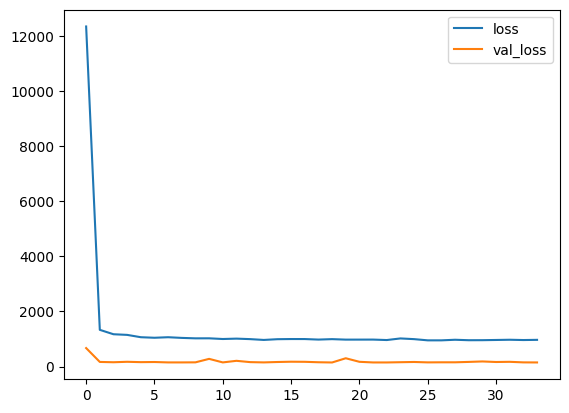

In [29]:
import matplotlib as plt
%matplotlib inline

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

<Axes: >

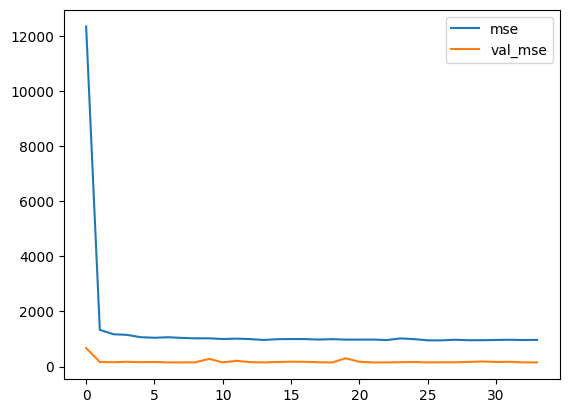

In [30]:
history_df.loc[:, ['mse', 'val_mse']].plot()

In [35]:
# Creating a dictionary with the input values
data = {'windspeed': [4.27]}

# Converting the dictionary into a pandas DataFrame
X = pd.DataFrame(data)
print(X)

   windspeed
0       4.27


In [36]:
modelwind.predict(X)

1/1 [==============================] - 0s 19ms/step


array([[271.90594 ,  16.659637]], dtype=float32)

In [38]:
import pickle

Pkl_Filename = "saved_wind_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(modelwind, file)
